# Assignment 2 -> Model Building

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Placement_Prediction_data.csv")
dataset

,Unnamed: 0,StudentId,CGPA,Major Projects,Workshops/Certificatios,Mini Projects,Skills,Communication Skill Rating,Internship,Hackathon,12th Percentage,10th Percentage,backlogs,PlacementStatus
0,0,1,7.5,1.0,1,1.0,6.0,4.4,No,No,61,79,2.0,NotPlaced
1,1,2,8.9,0.0,3,2.0,9.0,4.0,Yes,Yes,78,82,0.0,Placed
2,2,3,7.3,1.0,2,2.0,8.0,4.8,Yes,No,79,80,2.0,NotPlaced
3,3,4,7.5,1.0,1,2.0,8.0,4.4,Yes,Yes,81,80,0.0,Placed
4,4,5,8.3,1.0,2,2.0,8.0,4.5,Yes,Yes,74,88,0.0,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9996,7.5,1.0,1,2.0,7.0,3.9,Yes,No,85,66,4.0,NotPlaced
9996,9996,9997,7.4,0.0,1,0.0,9.0,4.8,No,No,84,67,1.0,Placed
9997,9997,9998,8.4,1.0,3,0.0,7.0,4.8,Yes,Yes,79,81,0.0,Placed
9998,9998,9999,8.9,0.0,3,2.0,8.0,4.8,Yes,Yes,71,85,0.0,Placed


In [3]:
dataset.drop(['Unnamed: 0'], inplace=True, axis=1)
dataset

,StudentId,CGPA,Major Projects,Workshops/Certificatios,Mini Projects,Skills,Communication Skill Rating,Internship,Hackathon,12th Percentage,10th Percentage,backlogs,PlacementStatus
0,1,7.5,1.0,1,1.0,6.0,4.4,No,No,61,79,2.0,NotPlaced
1,2,8.9,0.0,3,2.0,9.0,4.0,Yes,Yes,78,82,0.0,Placed
2,3,7.3,1.0,2,2.0,8.0,4.8,Yes,No,79,80,2.0,NotPlaced
3,4,7.5,1.0,1,2.0,8.0,4.4,Yes,Yes,81,80,0.0,Placed
4,5,8.3,1.0,2,2.0,8.0,4.5,Yes,Yes,74,88,0.0,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7.5,1.0,1,2.0,7.0,3.9,Yes,No,85,66,4.0,NotPlaced
9996,9997,7.4,0.0,1,0.0,9.0,4.8,No,No,84,67,1.0,Placed
9997,9998,8.4,1.0,3,0.0,7.0,4.8,Yes,Yes,79,81,0.0,Placed
9998,9999,8.9,0.0,3,2.0,8.0,4.8,Yes,Yes,71,85,0.0,Placed


In [4]:
dataset.columns

Index(['StudentId', 'CGPA', 'Major Projects', 'Workshops/Certificatios',
       'Mini Projects', 'Skills', 'Communication Skill Rating', 'Internship',
       'Hackathon', '12th Percentage', '10th Percentage', 'backlogs',
       'PlacementStatus'],
      dtype='object')

# 1. Data Cleaning

In [5]:
dataset.isna().sum()

StudentId                     0
CGPA                          0
Major Projects                1
Workshops/Certificatios       0
Mini Projects                 1
Skills                        3
Communication Skill Rating    0
Internship                    0
Hackathon                     0
12th Percentage               0
10th Percentage               0
backlogs                      1
PlacementStatus               0
dtype: int64

In [6]:
dataset.dropna(inplace=True)
dataset.isna().sum()

StudentId                     0
CGPA                          0
Major Projects                0
Workshops/Certificatios       0
Mini Projects                 0
Skills                        0
Communication Skill Rating    0
Internship                    0
Hackathon                     0
12th Percentage               0
10th Percentage               0
backlogs                      0
PlacementStatus               0
dtype: int64

# Data Transformation

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder = LabelEncoder()
dataset['Internship'] = encoder.fit_transform(dataset['Internship'])
dataset['Hackathon'] = encoder.fit_transform(dataset['Hackathon'])
dataset['PlacementStatus'] = encoder.fit_transform(dataset['PlacementStatus'])

In [9]:
dataset

,StudentId,CGPA,Major Projects,Workshops/Certificatios,Mini Projects,Skills,Communication Skill Rating,Internship,Hackathon,12th Percentage,10th Percentage,backlogs,PlacementStatus
0,1,7.5,1.0,1,1.0,6.0,4.4,0,0,61,79,2.0,0
1,2,8.9,0.0,3,2.0,9.0,4.0,1,1,78,82,0.0,1
2,3,7.3,1.0,2,2.0,8.0,4.8,1,0,79,80,2.0,0
3,4,7.5,1.0,1,2.0,8.0,4.4,1,1,81,80,0.0,1
4,5,8.3,1.0,2,2.0,8.0,4.5,1,1,74,88,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7.5,1.0,1,2.0,7.0,3.9,1,0,85,66,4.0,0
9996,9997,7.4,0.0,1,0.0,9.0,4.8,0,0,84,67,1.0,1
9997,9998,8.4,1.0,3,0.0,7.0,4.8,1,1,79,81,0.0,1
9998,9999,8.9,0.0,3,2.0,8.0,4.8,1,1,71,85,0.0,1


# Data Integration

In [10]:
sub_1 = dataset.iloc[:5000, :]
sub_2 = dataset.iloc[5000:9000, :]

In [11]:
merge = pd.concat([sub_1, sub_2])
merge

,StudentId,CGPA,Major Projects,Workshops/Certificatios,Mini Projects,Skills,Communication Skill Rating,Internship,Hackathon,12th Percentage,10th Percentage,backlogs,PlacementStatus
0,1,7.5,1.0,1,1.0,6.0,4.4,0,0,61,79,2.0,0
1,2,8.9,0.0,3,2.0,9.0,4.0,1,1,78,82,0.0,1
2,3,7.3,1.0,2,2.0,8.0,4.8,1,0,79,80,2.0,0
3,4,7.5,1.0,1,2.0,8.0,4.4,1,1,81,80,0.0,1
4,5,8.3,1.0,2,2.0,8.0,4.5,1,1,74,88,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9000,9001,7.8,1.0,3,2.0,9.0,4.8,1,1,83,88,1.0,1
9001,9002,7.5,1.0,1,0.0,7.0,4.6,0,0,79,72,3.0,0
9002,9003,6.6,1.0,1,1.0,6.0,4.1,0,1,63,67,4.0,0
9003,9004,6.9,1.0,1,0.0,7.0,4.5,0,1,57,63,2.0,0


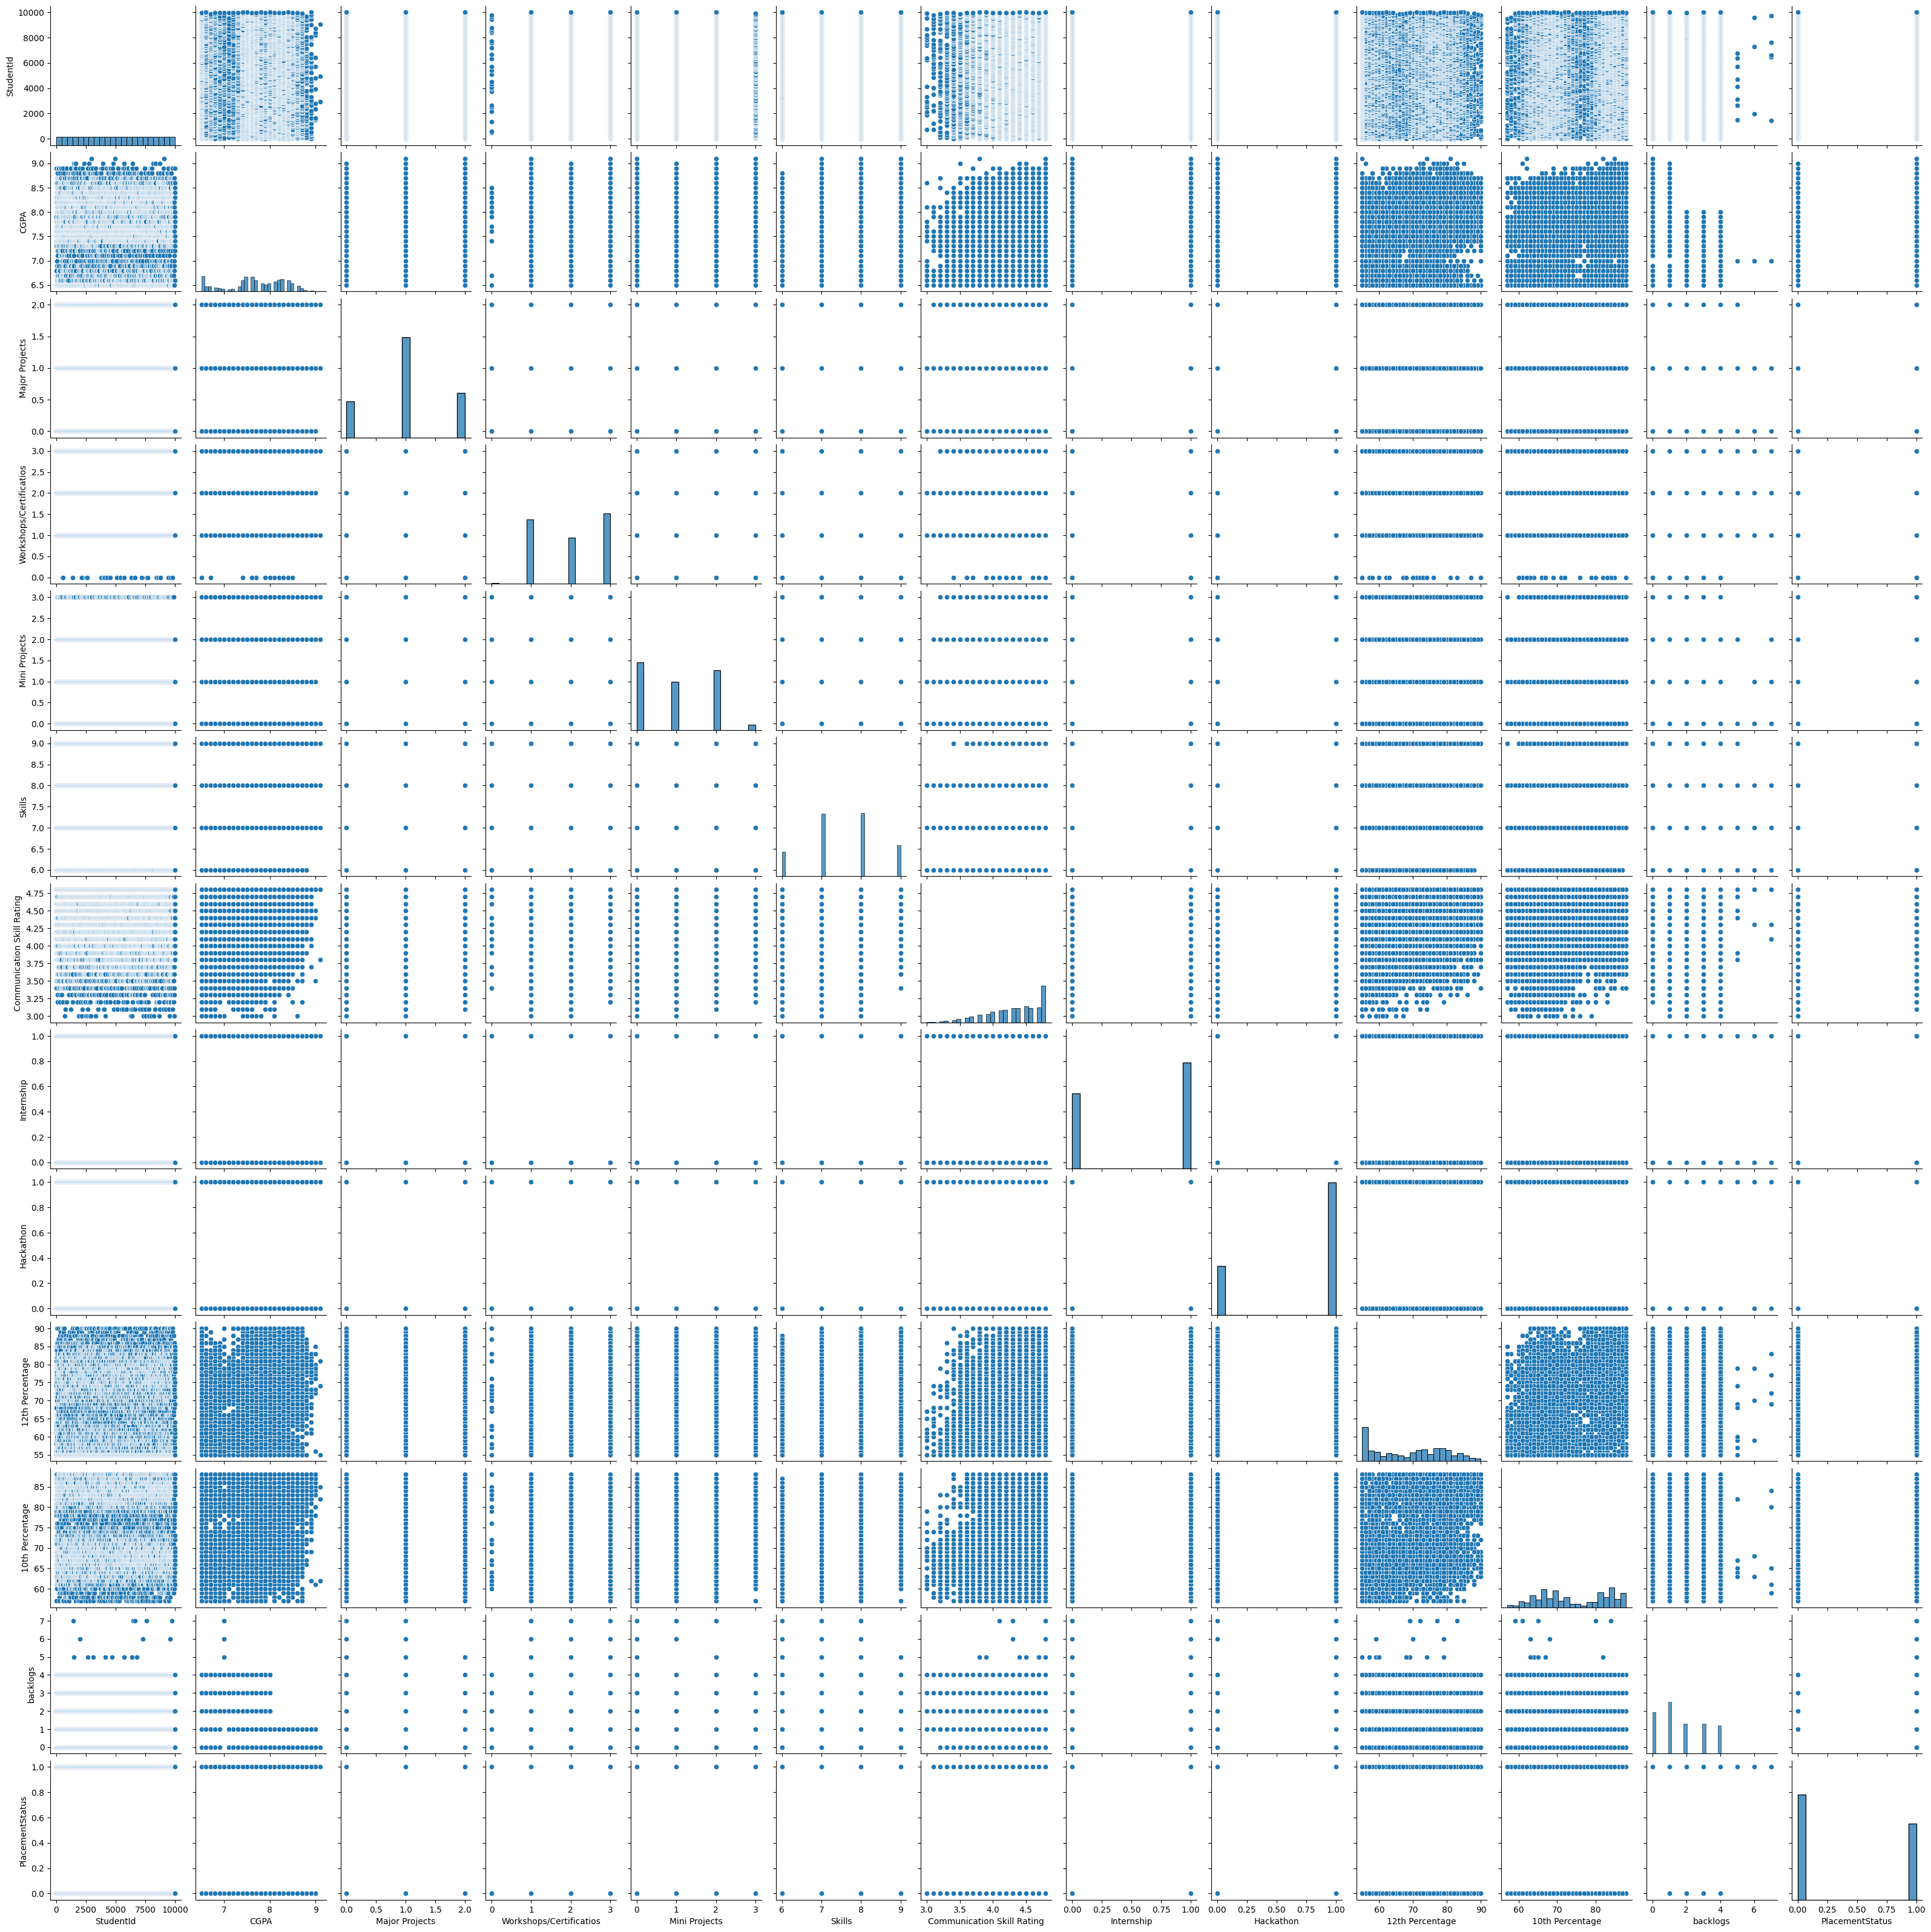

In [12]:
sns.pairplot(dataset)

# Visualize

In [12]:
dataset.dtypes

StudentId                       int64
CGPA                          float64
Major Projects                float64
Workshops/Certificatios         int64
Mini Projects                 float64
Skills                        float64
Communication Skill Rating    float64
Internship                      int64
Hackathon                       int64
12th Percentage                 int64
10th Percentage                 int64
backlogs                      float64
PlacementStatus                 int64
dtype: object

Text(0.5, 1.0, 'CGPA vs Placement Status')

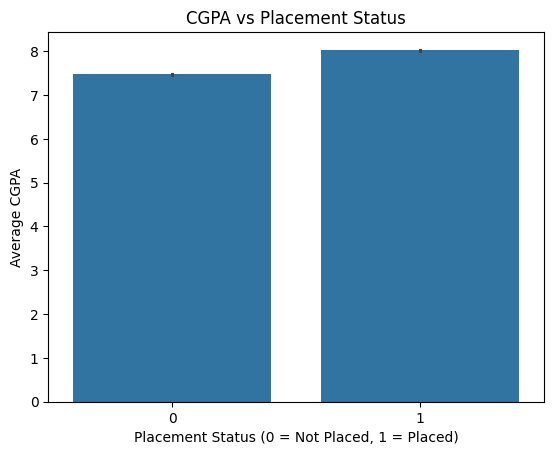

In [13]:
sns.barplot(x="PlacementStatus", y="CGPA", data=dataset)
plt.xlabel("Placement Status (0 = Not Placed, 1 = Placed)")
plt.ylabel("Average CGPA")
plt.title("CGPA vs Placement Status")

Text(0.5, 1.0, 'Internship Count Distribution')

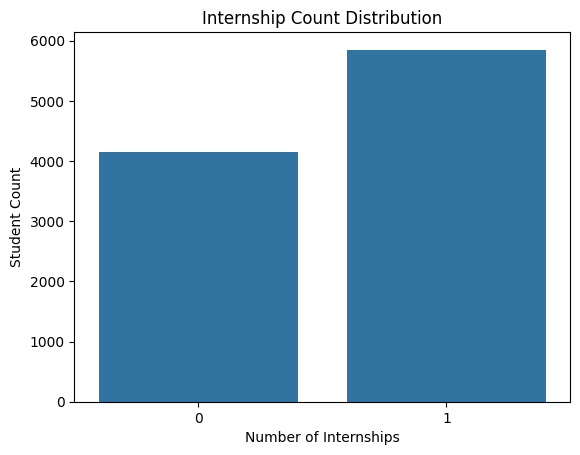

In [14]:
sns.countplot(x="Internship", data=dataset)
plt.xlabel("Number of Internships")
plt.ylabel("Student Count")
plt.title("Internship Count Distribution")

Text(0, 0.5, '')

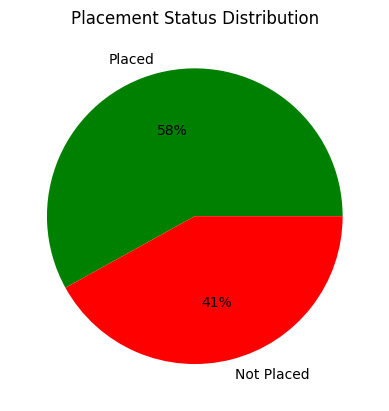

In [15]:
dataset["PlacementStatus"].value_counts().plot.pie(autopct="%d%%", labels=["Placed", "Not Placed"], colors=["green", "red"])
plt.title("Placement Status Distribution")
plt.ylabel("")

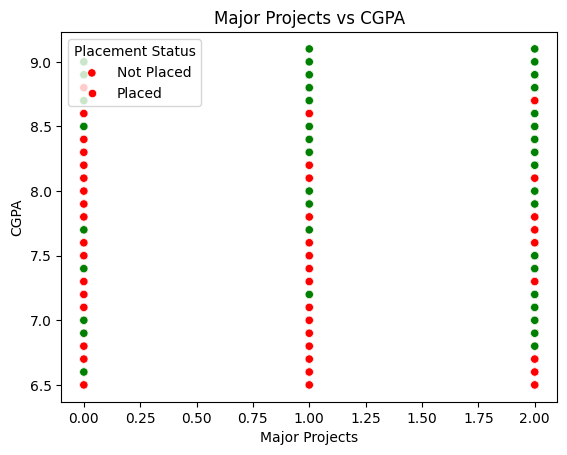

In [16]:
sns.scatterplot(x="Major Projects", y="CGPA", hue="PlacementStatus", data=dataset, palette={0: "red", 1: "green"})
plt.xlabel("Major Projects")
plt.ylabel("CGPA")
plt.title("Major Projects vs CGPA")
plt.legend(title="Placement Status", labels=["Not Placed", "Placed"])

# Error Correction

# Model Building

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [25]:
X = dataset.drop("PlacementStatus", axis=1)
y = dataset['PlacementStatus']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
len(X_train), len(X_test)

(7496, 2499)

### Using RandomForestClassifier

In [27]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

y_pred_rfc = rfc_model.predict(X_test)

In [18]:
acc = accuracy_score(y_test, y_pred_rfc)
acc

0.936374549819928

In [29]:
report = classification_report(y_test, y_pred_rfc)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1444
           1       0.92      0.94      0.93      1055

    accuracy                           0.94      2499
   macro avg       0.94      0.94      0.94      2499
weighted avg       0.94      0.94      0.94      2499



In [30]:
pre = precision_score(y_test, y_pred_rfc)
pre

0.9239332096474954

In [31]:
rec = recall_score(y_test, y_pred_rfc)
rec

0.9440758293838862

In [32]:
cf = confusion_matrix(y_test, y_pred_rfc)
cf

array([[1362,   82],
       [  59,  996]])

### Using DecisionTreeClassifier

In [33]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

In [34]:
acc = accuracy_score(y_test, y_pred_tree)
acc

0.9179671868747499

In [35]:
report = classification_report(y_test, y_pred_tree)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1444
           1       0.90      0.91      0.90      1055

    accuracy                           0.92      2499
   macro avg       0.92      0.92      0.92      2499
weighted avg       0.92      0.92      0.92      2499



In [36]:
pre = precision_score(y_test, y_pred_tree)
pre

0.8986866791744841

In [37]:
rec = recall_score(y_test, y_pred_tree)
rec

0.9080568720379147

In [38]:
cf = confusion_matrix(y_test, y_pred_tree)
cf

array([[1336,  108],
       [  97,  958]])

# Prediction

In [39]:
X_test_1 = X_test.iloc[10]
y_test_1 = y_test.iloc[10]

y_pred_1 = rfc_model.predict(X_test_1.values.reshape(1, -1))
print(f"Original -> {y_test_1}")
print(f"Predicted -> {y_pred_1[0]}")

Original -> 0
Predicted -> 0


/Users/parasningune/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
